In [0]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

In [0]:
def initial_state(N):
  '''generate a random spin configuration for initial state'''
  state = 2* np.random.randint(2, size=(N, N)) - 1
  return state 

def mc_move(config, beta):
  '''Monte Carlo move using Metropolis algorithm'''
  for i in range(N):
    for j in range(N):
      a = np.random.randint(0, N)
      b = np.random.randint(0, N)
      s = config[a, b]
      nb = config[(a+1) % N, b] + config[a, (b+1)% N] + config[(a-1) % N, b] + config[a, (b -1)% N] # % gives remainder
      
      cost = 2 * s * nb             # dE, change in energy
      if cost < 0:
        s *= -1
      elif rand() < np.exp(-cost * beta):
        s *= -1

      config[a, b] = s

  return config

def calc_energy(config):
  '''Calculate Energy of a given configuration'''
  energy = 0
  for i in range(len(config)):
    for j in range(len(config)):
      S = config[i, j]
      nb = config[(i+1) % N, j] + config[i, (j+1)% N] + config[(i-1) % N, j] + config[i, (j -1)% N]
      energy += -nb * S 
  return energy/4

def clac_mag(config):
  '''Magnetization of a given configuration'''
  mag = np.sum(config)
  return mag

In [0]:
## change these parameters for a smaller (faster) simulation 
nt = 88               #  number of temperature points
N = 50                #  size of the lattice, N x N
eqSteps = 500        #  number of MC sweeps for equilibration
mcSteps = 500       #  number of MC sweeps for calculation
T = np.linspace(0.7, 4, nt)
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1 = 1.0/(mcSteps* N * N)
n2 = 1.0/(mcSteps* mcSteps* N * N)

# divide by number of samples, and by system size to get intensive values

In [0]:
%%time
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
for ii in range(nt):
  E1 = M1 = E2 = M2 = 0
  config = initial_state(N)
  iT = 1.0/T[ii]  # iT is inverse T
  iT2 = iT * iT

  for i in range(eqSteps): # equilibrate
    mc_move(config, iT) # Monte Carlo moves

  for i in range(mcSteps):
    mc_move(config, iT)
    Ene = calc_energy(config)
    Mag = clac_mag(config)

    E1 += Ene
    M1 += Mag
    E2 += Ene * Ene
    M2 += Mag * Mag

  E[ii] = n1 * E1
  M[ii] = n1 * M1
  C[ii] = (n1 * E2 - n2 * E1 * E1) * iT2
  X[ii] = (n1*M2 - n2*M1*M1)*iT

CPU times: user 46min 5s, sys: 195 ms, total: 46min 5s
Wall time: 46min 6s


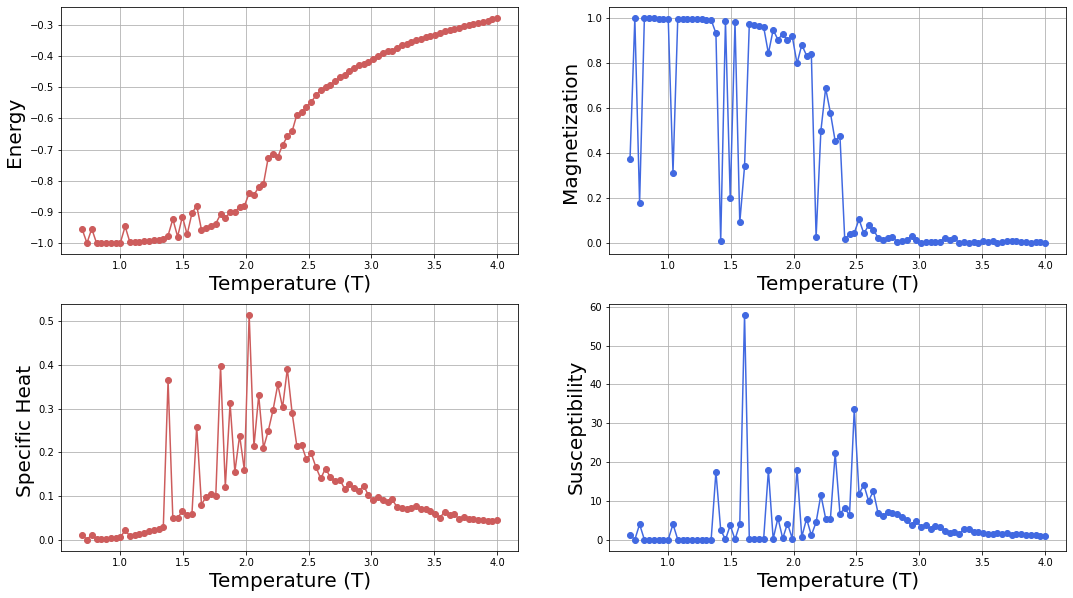

In [0]:
from google.colab import files
f = plt.figure(figsize=(18, 10))
sp =f.add_subplot(2, 2, 1)
plt.plot(T, E, 'o-', color= 'IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);  plt.axis('tight')
plt.grid()

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(M), 'o-', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');
plt.grid()

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, C, 'o-', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   
plt.grid()

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, X, 'o-', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
plt.grid()

plt.savefig("2D-Ising-Monte-Carlo.png")
files.download("2D-Ising-Monte-Carlo.png") 

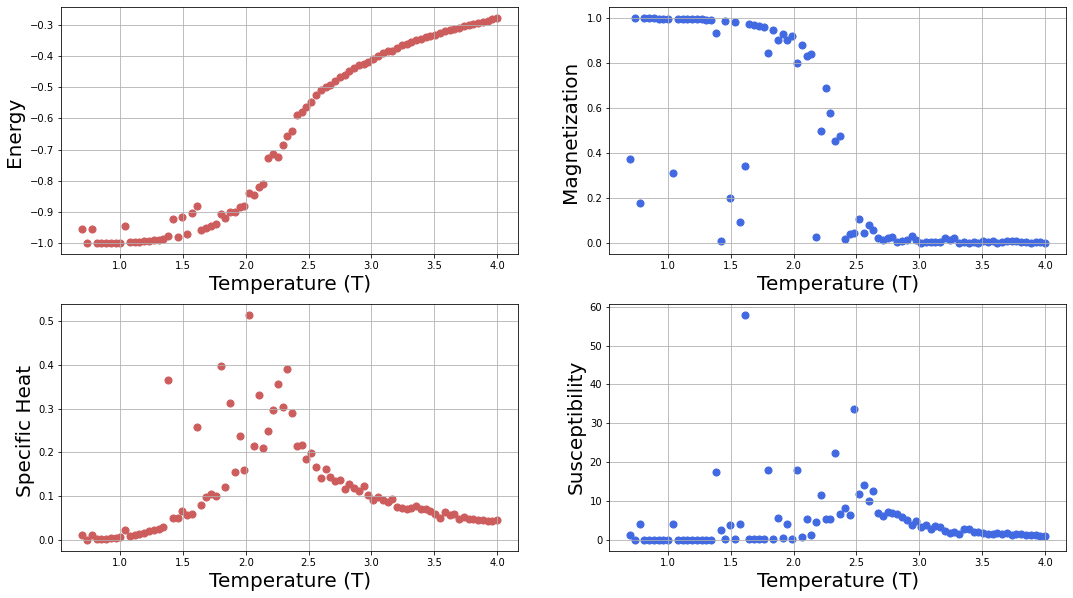

In [0]:
from google.colab import files
f = plt.figure(figsize=(18, 10))
sp =f.add_subplot(2, 2, 1)
plt.scatter(T, E, s =50, marker = 'o', color= 'IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);  plt.axis('tight')
plt.grid()

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');
plt.grid()

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   
plt.grid()

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');
plt.grid()
plt.savefig("2D-Ising-Monte-Carlo.png")
# files.download("2D-Ising-Monte-Carlo.png") 